# House Price Prediction 

In this notebook, we will be implementing Machine Learning Models to predict Boston House Prices


## Exploratory Data Analysis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

np.random.seed(42)

In [0]:
## import dataset

from google.colab import files
uploaded = files.upload()



Saving housing.csv to housing.csv


In [0]:
import io
import pandas as pd

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
houseprice = pd.read_csv(io.BytesIO(uploaded['housing.csv']),names=names, delim_whitespace=True)

In [0]:
houseprice.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
print(houseprice.shape)

(506, 14)


In [0]:
houseprice.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Histograms

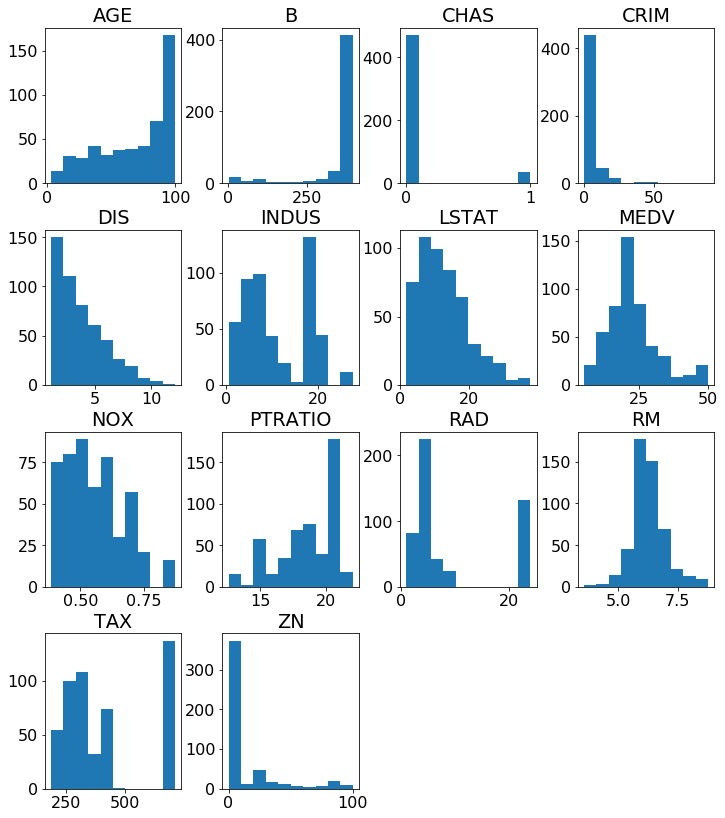

In [0]:
houseprice.hist(figsize=(12,14),grid=False);

Normal distribution: RM

Closer look to the distribution of MEDV (our target)

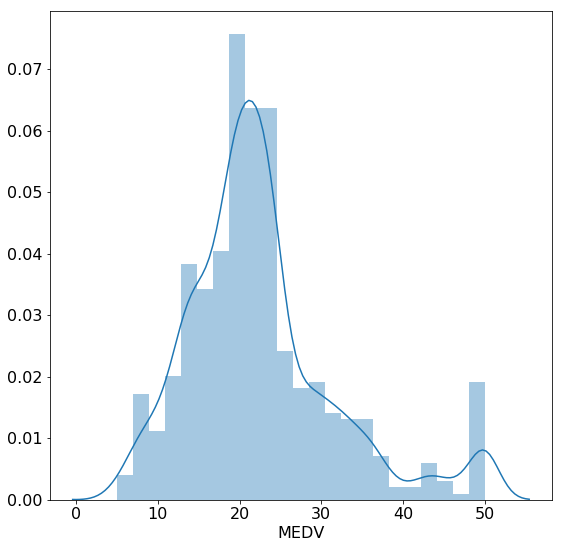

In [0]:
import seaborn as sns 
sns.distplot(houseprice['MEDV']) 

The distribution of the median house price is slightly skewed to the right

### Correlation

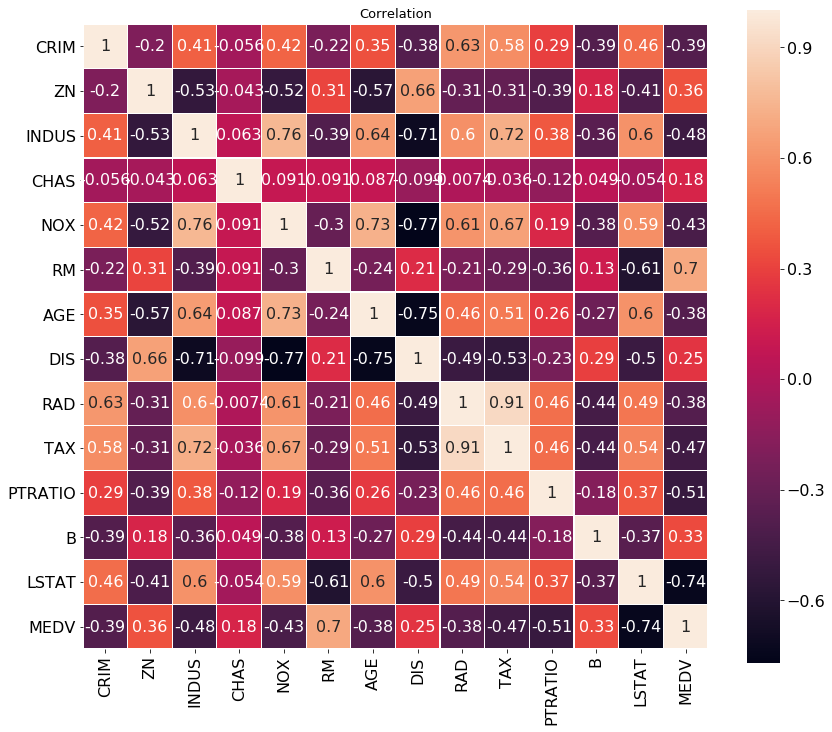

In [0]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation',y=1,size=13)

sns.heatmap(houseprice.corr(),square = True,linewidths=0.25, annot=True, vmax=1)

### Correlation with the target value (MEDV)

In [0]:
houseprice.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

#### Correlation (Absolute)

In [0]:
houseprice.corr().abs()['MEDV'].sort_values().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

It can be seen that the status of the population (LSTAT) has the highest correlation with the house price, followed by average number of rooms per dwelling (RM), etc

We want to select 6 correlated variables with the MEDV variable:

In [0]:
most_correlated = houseprice.corr().abs()['MEDV'].sort_values().sort_values(ascending=False)
    
# Maintain the top 6 most correlation features with Grade
most_correlated = most_correlated[:7]
    
most_correlated

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
Name: MEDV, dtype: float64

In [0]:
houseprice = houseprice.loc[:, most_correlated.index]
houseprice.head()

,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,24.0,4.98,6.575,15.3,2.31,296.0,0.538
1,21.6,9.14,6.421,17.8,7.07,242.0,0.469
2,34.7,4.03,7.185,17.8,7.07,242.0,0.469
3,33.4,2.94,6.998,18.7,2.18,222.0,0.458
4,36.2,5.33,7.147,18.7,2.18,222.0,0.458


In [0]:
print(houseprice.shape)

(506, 7)


In [0]:
prices = houseprice['MEDV']
features = houseprice.drop('MEDV', axis = 1)
features.head()

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,4.98,6.575,15.3,2.31,296.0,0.538
1,9.14,6.421,17.8,7.07,242.0,0.469
2,4.03,7.185,17.8,7.07,242.0,0.469
3,2.94,6.998,18.7,2.18,222.0,0.458
4,5.33,7.147,18.7,2.18,222.0,0.458


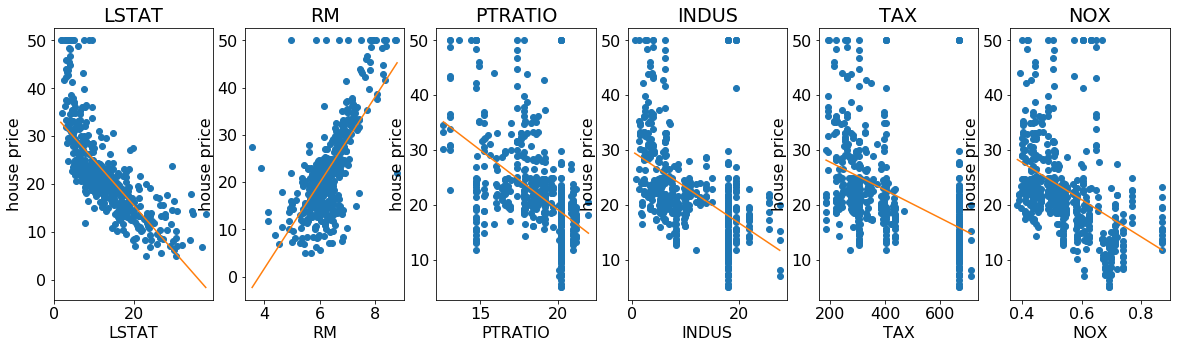

In [0]:
import numpy
from numpy import arange

plt.figure(figsize=(20, 5))
# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 6, i+1)
    x = houseprice[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(numpy.unique(x), numpy.poly1d(numpy.polyfit(x, y, 1))(numpy.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('house price')

It can be seen that the house price decreases as LSTAT , PTRATIO, INDUS, TAX or NOX increases, while the house price increases when RM increases

### Checking missing values

In [0]:
houseprice.isnull().sum().max()

0

## Implementing Machine Learning Models

In [0]:
# Splitting data into training/testing
from sklearn.model_selection import train_test_split




X_train, X_test, y_train, y_test = train_test_split(houseprice, prices, 
                                                        test_size = 0.30,
                                                        random_state=100)
    


In [0]:
X_train.head()

,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
463,20.2,10.29,6.513,20.2,18.10,666.0,0.713
75,21.4,8.94,6.286,18.7,12.83,398.0,0.437
478,14.6,18.03,6.185,20.2,18.10,666.0,0.614
199,34.9,4.56,6.975,17.0,1.47,402.0,0.403
84,23.9,9.62,6.389,18.5,4.49,247.0,0.449


In [0]:
X_test.head()

,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
198,34.6,6.62,7.274,12.6,1.52,329.0,0.404
229,31.5,3.76,6.552,17.4,6.20,307.0,0.504
502,20.6,9.08,6.120,21.0,11.93,273.0,0.573
31,14.5,13.04,6.072,21.0,8.14,307.0,0.538
315,16.2,11.50,5.705,18.4,9.90,304.0,0.544


In [0]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR





# Evaluate several ml models by training on training set and testing on testing set

def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression','Random Forest','SVM',
                       'Gradient Boosted']
    X_train = X_train.drop(columns='MEDV')
    X_test = X_test.drop(columns='MEDV')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = RandomForestRegressor()
    model3 = SVR(kernel='rbf')
    model4 = GradientBoostingRegressor()
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
   
    
    return results

In [0]:
results = evaluate(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
results

,mae,rmse
Linear Regression,3.81505,5.97063
Random Forest,2.93987,4.83077
SVM,5.49208,8.60462
Gradient Boosted,2.61949,4.37265


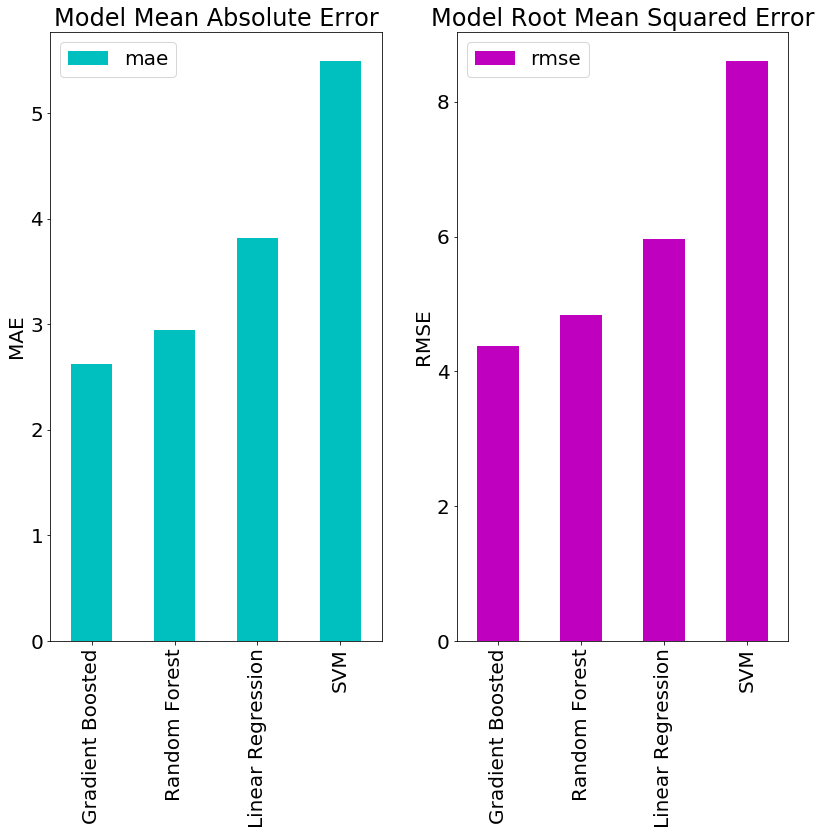

In [0]:
from IPython.core.pylabtools import figsize


figsize(12,12)
matplotlib.rcParams['font.size'] = 20
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'c', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'm', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()